# Project Goals
In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [134]:
import pandas as pd
dete_survey = pd.read_csv("dete_survey.csv", na_values = 'Not Stated')
tafe_survey= pd.read_csv("tafe_survey.csv")
dete_survey.info()
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [135]:
print(dete_survey.head())
print(tafe_survey.head())

   ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In [136]:
print(dete_survey.isnull().sum())
print(tafe_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

There are a bunch of columns we don't need to answer our original questions, so we're going to drop them to make the data set a bit easier to handle

In [137]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated= tafe_survey.drop(tafe_survey.columns[28:49], axis = 1)

In [138]:
dete_survey_updated.info()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [139]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
print(dete_survey_updated.columns)

tafe_survey_new_names = {"Record ID" : "ID", "CESSATION YEAR" : "cease_date", "Reason for ceasing employment" : "separationtype", "Gender. What is your Gender?" : "gender" , 
"CurrentAge. Current Age" : "age" , "Employment Type. Employment Type" : "employment_status" , "Classification. Classification" : "position" , 
"LengthofServiceOverall. Overall Length of Service at Institute (in years)" : "institute_service" , 
"LengthofServiceCurrent. Length of Service at current workplace (in years)" : "role_service"}

tafe_survey_updated.rename(tafe_survey_new_names ,axis = 1 , inplace= True)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['ID', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

# Some Changes to the column names
Above we changed the dete survey dateframe to have a standarized naming scheme (lower case, _ instead of spaces). For the tafe_survey, we changed the name of certain columns to follow the same general naming scheme and renamed them to something shorter and more manageable.

In [140]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())



Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [141]:
#Isolating only the rows where the employee resigned so we can answer the question 'Do employees that resign in a short time have some sort of dissatisfaction?
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains("Resignation")].copy()
print(dete_resignations['separationtype'].value_counts())
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains("Resignation", na = False)].copy()
print(tafe_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64
Resignation    340
Name: separationtype, dtype: int64


In [142]:
#Before extracting just the years from cease date
print( dete_resignations['cease_date'].value_counts())
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)
#After extracting just the year
print( dete_resignations["cease_date"].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [143]:
print(dete_resignations['cease_date'].value_counts().sort_values(ascending=True))
print(dete_resignations['dete_start_date'].value_counts().sort_values(ascending = True))
print(tafe_resignations['cease_date'].value_counts())

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64
1975.0     1
1973.0     1
1971.0     1
1982.0     1
1984.0     1
1977.0     1
1963.0     1
1972.0     1
1987.0     1
1974.0     2
1976.0     2
1983.0     2
2001.0     3
1985.0     3
1986.0     3
1991.0     4
1988.0     4
1989.0     4
1995.0     4
1990.0     5
1993.0     5
1980.0     5
1997.0     5
2002.0     6
1996.0     6
1994.0     6
1992.0     6
1998.0     6
2003.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


[]

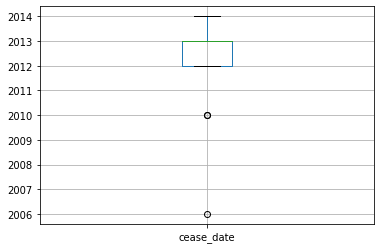

In [144]:
dete_resignations.boxplot('cease_date')
import matplotlib.pyplot as plt
plt.plot()  

[]

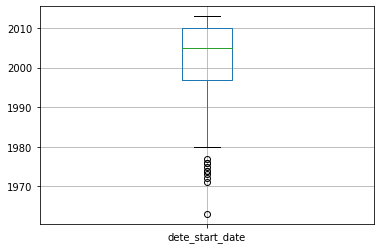

In [145]:

dete_resignations.boxplot('dete_start_date')
plt.plot()

[]

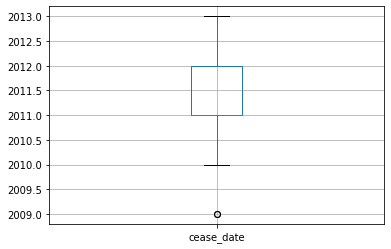

In [146]:

tafe_resignations.boxplot('cease_date')
plt.plot()

The years in both dataframes don't completely align. The tafe_survey_updated dataframe contains some cease dates in 2009, but the dete_survey_updated dataframe does not. The tafe_survey_updated dataframe also contains many more cease dates in 2010 than the dete_survey_updaed dataframe. Since we aren't concerned with analyzing the results by year, we'll leave them as is.

In [147]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
print(dete_resignations['institute_service'])
print(tafe_resignations['institute_service'])

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64
3       NaN
4       3-4
5      7-10
6       3-4
7       3-4
       ... 
696     5-6
697     1-2
698     NaN
699     5-6
701     3-4
Name: institute_service, Length: 340, dtype: object


# Institute Service
In our tafe dataframe, we have a column that holds the institute_service, basically how long someone served that job. We do not have a similar column in our dete dataframe, so we had to just modify the dete_resignation dataframe to hold this new coloumn to see how long someone lasted at the job.

In [148]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

import numpy as np

def update_vals(col):
    if pd.isnull(col):
        return np.nan
    elif col == '-':
        return False
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
print(tafe_resignations['dissatisfied'].value_counts(dropna = False))

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


In [149]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment','lack_of_recognition','employment_conditions']].any(1,skipna = False)
print(dete_resignations['dissatisfied'].value_counts(dropna = False))

False    228
True      83
Name: dissatisfied, dtype: int64


# Dissatisfaction
In the above two cells, we created a new column in each of the dataframes to hold a boolean value to see if an employee was disatisfied with the career that's why they left. For the tafe dataframe for example, we looked at 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction' columns to see if they were disatisfied, and then put that into the dissatisfaction column for tafe resignations

In [150]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

combined = pd.concat([dete_resignations,tafe_resignations])

combined.dropna(axis = 1, thresh = 500, inplace = True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   separationtype     651 non-null    object 
 1   cease_date         635 non-null    float64
 2   position           598 non-null    object 
 3   employment_status  597 non-null    object 
 4   gender             592 non-null    object 
 5   age                596 non-null    object 
 6   institute_service  563 non-null    object 
 7   dissatisfied       643 non-null    object 
 8   institute          651 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.9+ KB


# Combined
Above we created a dataframe that combined the two dataframes together, and now our 'combined' dataframe is manageable to work with. We have only 9 cols to work with, and both the dataframes have the dissatisfied col now.

In [151]:
print(combined['institute_service'].value_counts())

print(combined['institute_service'].astype(str).str.extract(r'(\d+)').value_counts())

combined['institute_service'] = combined['institute_service'].astype(str).str.extract(r'(\d+)').astype(float)


def career_stage(col):
    if pd.isnull(col):
        return np.nan
    elif col < 3:
         return 'New'
    elif col < 6:
         return 'Experienced'
    elif col < 10:
         return 'Established'
    else:
         return 'Veteran'

combined.info()



Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
17.0                   6
10.0                   6
14.0                   6
22.0                   6
12.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
26.0                   2
25.0                   2
28.0                   2
36.0                   2
30.0                   2
38.0                   1


In [152]:

combined['service_cat'] = combined['institute_service'].apply(career_stage )
combined['service_cat'].value_counts()

New            193
Experienced    155
Veteran        142
Established     73
Name: service_cat, dtype: int64

# Service Category
Created a new service category that places an employee into these 4 categories, [new, experienced, veteran, established]. If they had 3 years or less, they were considered new, 6 years and less, they were experienced, less than 10 years they were established, and anything over 10 were veteran workers.

False    411
True     152
Name: dissatisfied, dtype: int64
False    411
True     152
Name: dissatisfied, dtype: int64


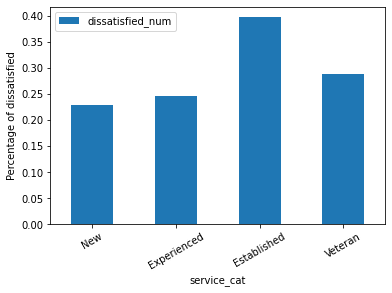

In [177]:
print(combined['dissatisfied'].value_counts(dropna = False))
#Dropping rows where dissatisfied or service cat had a null value
combined = combined[combined['dissatisfied'].notna()]
combined = combined[combined['service_cat'].notna()]
print(combined['dissatisfied'].value_counts(dropna = False))
combined['dissatisfied_num'] = combined['dissatisfied'].astype(int)

pv_table = pd.pivot_table(combined, index = 'service_cat', values = 'dissatisfied_num')
pv_table = pv_table.loc[['New', 'Experienced', 'Established', 'Veteran'],:]
pv_table.plot(kind = 'bar' , rot = 30, ylabel = "Percentage of dissatisfied")


plt.show()

# Conclusion
As we can see from the bar graph, workers are most likely to resign to dissatisfaction during the 7-10 year period, and workers are more likely to quit due to more dissatisfaction until they hit veteranship status.